# Principal Component Analysis (PCA):

**Principal Component Analysis (PCA)** is a popular technique used for dimensionality reduction in data analysis and machine learning. PCA can transform a higher dimensional data into a lower dimensional data while keeping the essence of data.

PCA is a feature extraction technique that reduces the curse of dimensionality in a dataset.

Benefits of Using PCA:
- Faster execution of algorithm.
- Visualization -> PCA reduces the higher dimensional data into lower dimensional data so we can easily visualize the data. 

### Importing Module & Libraries:

In [1]:
import pandas as pd
from pydataset import data
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

### Loading Data:

In [2]:
df = data('pneumon')
df = df.dropna()
df = df.iloc[0:199,]
df.head()

,chldage,hospital,mthage,urban,alcohol,smoke,region,poverty,bweight,race,education,nsibs,wmonth,sfmonth,agepn
1,12.0,0,22,1,0,0,1,1,1,1,10,1,1,1,1
2,12.0,0,20,1,1,0,1,1,0,1,12,1,2,2,12
3,3.0,0,24,1,3,0,1,1,0,1,12,2,1,0,3
4,2.0,0,22,1,2,2,1,1,0,1,9,0,0,0,2
5,4.0,0,21,1,1,2,1,1,1,1,12,0,0,0,4


We are going to use first 200 rows of the data. This is not how it works in the real world, it's only for demonstration purposes.

### Summary Statistics:

In [3]:
df.describe()

,chldage,hospital,mthage,urban,alcohol,smoke,region,poverty,bweight,race,education,nsibs,wmonth,sfmonth,agepn
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,9.899497,0.010050,21.994975,0.914573,0.954774,0.512563,1.613065,0.934673,0.221106,1.236181,11.758794,0.507538,2.030151,1.130653,7.778894
std,3.516907,0.099997,2.712667,0.280221,1.173342,0.673145,0.663652,0.247725,0.416038,0.550021,1.790015,0.730776,3.533261,1.776108,4.454184
min,0.500000,0.000000,16.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,20.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,11.000000,0.000000,0.000000,0.000000,3.000000
50%,12.000000,0.000000,22.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,1.000000,12.000000,0.000000,0.000000,0.000000,9.000000
75%,12.000000,0.000000,24.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,12.000000,1.000000,3.000000,2.000000,12.000000
max,12.000000,1.000000,28.000000,1.000000,4.000000,2.000000,4.000000,1.000000,1.000000,3.000000,16.000000,4.000000,20.000000,9.000000,12.000000


### Standardization:

Now we are going to scale our data using **StandardScaler**.

In [4]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.598765,-0.100759,0.001857,0.305625,-0.815774,-0.763365,-0.926105,0.264372,1.876893,-0.430487,-0.985037,0.675589,-0.292293,-0.073747,-1.525755
1,0.598765,-0.100759,-0.737284,0.305625,0.038642,-0.763365,-0.926105,0.264372,-0.532795,-0.430487,0.135091,0.675589,-0.008555,0.490702,0.950062
2,-1.966756,-0.100759,0.740999,0.305625,1.747473,-0.763365,-0.926105,0.264372,-0.532795,-0.430487,0.135091,2.047448,-0.292293,-0.638196,-1.075606
3,-2.251814,-0.100759,0.001857,0.305625,0.893058,2.215256,-0.926105,0.264372,-0.532795,-0.430487,-1.545100,-0.696270,-0.576032,-0.638196,-1.300680
4,-1.681698,-0.100759,-0.367714,0.305625,0.038642,2.215256,-0.926105,0.264372,1.876893,-0.430487,0.135091,-0.696270,-0.576032,-0.638196,-0.850532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.598765,-0.100759,0.001857,0.305625,-0.815774,-0.763365,0.584509,0.264372,-0.532795,-0.430487,0.135091,-0.696270,0.275184,1.055150,-0.850532
195,0.598765,-0.100759,-0.737284,0.305625,-0.815774,-0.763365,0.584509,0.264372,1.876893,-0.430487,-0.424973,-0.696270,-0.292293,-0.073747,0.950062
196,0.598765,-0.100759,0.371428,0.305625,-0.815774,-0.763365,0.584509,0.264372,1.876893,-0.430487,-0.424973,0.675589,-0.008555,0.490702,0.950062
197,0.598765,-0.100759,-0.737284,0.305625,0.038642,2.215256,0.584509,0.264372,1.876893,-0.430487,0.135091,0.675589,0.558922,-0.073747,0.950062


One problem we have here is that if you look at the rows they no longer have the names of the different variables.
<br>
That's not a major deal but for the sake of thoroughness we're going to fix it.

In [5]:
df_scaled = df_scaled.rename(index=str, columns={0: 'chldage', 1: 'hospital', 2: 'mthage',
                                                 3: 'urban', 4: 'alcohol', 5: 'smoke',
                                                 6: 'region', 7: 'poverty', 8: 'bweight',
                                                 9: 'race', 10: 'education', 11: 'nsibs',
                                                 12: 'wmonth', 13: 'sfmonth', 14: 'agepn'})
df_scaled

,chldage,hospital,mthage,urban,alcohol,smoke,region,poverty,bweight,race,education,nsibs,wmonth,sfmonth,agepn
0,0.598765,-0.100759,0.001857,0.305625,-0.815774,-0.763365,-0.926105,0.264372,1.876893,-0.430487,-0.985037,0.675589,-0.292293,-0.073747,-1.525755
1,0.598765,-0.100759,-0.737284,0.305625,0.038642,-0.763365,-0.926105,0.264372,-0.532795,-0.430487,0.135091,0.675589,-0.008555,0.490702,0.950062
2,-1.966756,-0.100759,0.740999,0.305625,1.747473,-0.763365,-0.926105,0.264372,-0.532795,-0.430487,0.135091,2.047448,-0.292293,-0.638196,-1.075606
3,-2.251814,-0.100759,0.001857,0.305625,0.893058,2.215256,-0.926105,0.264372,-0.532795,-0.430487,-1.545100,-0.696270,-0.576032,-0.638196,-1.300680
4,-1.681698,-0.100759,-0.367714,0.305625,0.038642,2.215256,-0.926105,0.264372,1.876893,-0.430487,0.135091,-0.696270,-0.576032,-0.638196,-0.850532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,0.598765,-0.100759,0.001857,0.305625,-0.815774,-0.763365,0.584509,0.264372,-0.532795,-0.430487,0.135091,-0.696270,0.275184,1.055150,-0.850532
195,0.598765,-0.100759,-0.737284,0.305625,-0.815774,-0.763365,0.584509,0.264372,1.876893,-0.430487,-0.424973,-0.696270,-0.292293,-0.073747,0.950062
196,0.598765,-0.100759,0.371428,0.305625,-0.815774,-0.763365,0.584509,0.264372,1.876893,-0.430487,-0.424973,0.675589,-0.008555,0.490702,0.950062
197,0.598765,-0.100759,-0.737284,0.305625,0.038642,2.215256,0.584509,0.264372,1.876893,-0.430487,0.135091,0.675589,0.558922,-0.073747,0.950062


So, now we're getting to the point where we can actually start our **Principal Component Analysis (PCA)**.

In [6]:
pca_2c = PCA(n_components=2)
X_pca_2c = pca_2c.fit_transform(df_scaled)
X_pca_2c

array([[-7.50045820e-01,  7.27678626e-01],
       [-9.90201361e-02, -6.87074367e-01],
       [ 1.12891473e+00,  2.86182670e+00],
       [-3.85650171e-01,  2.54058770e+00],
       [-1.00740968e+00,  1.93324770e+00],
       [-8.36856273e-01, -5.26950166e-01],
       [ 4.70776301e-01,  1.42421526e+00],
       [ 2.14081744e+00,  1.50334772e+00],
       [ 6.25152230e-01,  1.65179493e+00],
       [ 6.50323113e-02, -1.03639408e+00],
       [ 6.16683509e-01, -1.10031924e-02],
       [ 1.15464941e+00,  6.59478076e-01],
       [-5.94884239e-01,  1.55543364e+00],
       [ 1.74928173e+00,  1.24373858e+00],
       [-1.67960224e+00,  5.02195766e-01],
       [-5.10219406e-01,  1.04742899e+00],
       [ 8.70689954e-01, -8.57221059e-01],
       [ 2.08423512e+00, -2.48615629e-01],
       [ 2.83326253e+00, -2.66738165e+00],
       [-1.48380776e+00, -1.33592407e+00],
       [ 6.97096476e-01,  2.91189341e+00],
       [ 1.32747141e+00,  3.74906193e+00],
       [ 1.77783570e+00,  1.66063033e-01],
       [ 3.

These two columns are trying to capture the information that was being presented in the original 15 variables.

In [7]:
pca_2c.explained_variance_ratio_

array([0.18201588, 0.12022734])

First component explain variance of 18% that's what comes from and second component explain 12% an additional variance.

In [8]:
pca_2c.explained_variance_ratio_.sum()

0.3022432124714818

By using just two components we are able to explain 30% of variance. In other words, we lost our 70% of the variance of the data that we already had so we would probably need to use more components.

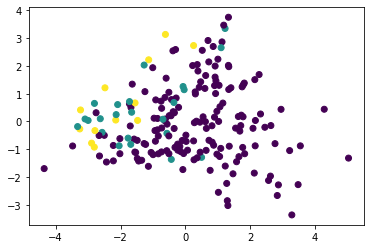

In [9]:
# let's visualize it

plt.scatter(X_pca_2c[:,0], X_pca_2c[:,1], c = df_scaled.race)

- X_pca_2c[:,0] -> this is for first column
- X_pca_2c[:,1] -> this is for second column
- Lastly, 'race' is one of the variable in the dataset

There is some of sort of a separation happening there this is another one of the purposes of **'Principal Component Analysis'**.

In [10]:
pca_4c = PCA(n_components=4)
X_pca_4c = pca_4c.fit_transform(df_scaled)
X_pca_4c

array([[-7.50045820e-01,  7.27678626e-01,  2.73093792e-01,
        -2.95398489e-01],
       [-9.90201361e-02, -6.87074367e-01, -4.86159548e-01,
         4.55998900e-01],
       [ 1.12891473e+00,  2.86182670e+00, -3.49809085e-01,
        -5.51685713e-01],
       [-3.85650171e-01,  2.54058770e+00, -9.28741130e-01,
        -1.89556814e+00],
       [-1.00740968e+00,  1.93324770e+00, -7.53177912e-01,
        -1.49409484e+00],
       [-8.36856273e-01, -5.26950166e-01, -3.60015675e-01,
         1.30281006e+00],
       [ 4.70776301e-01,  1.42421526e+00,  2.41436808e-01,
         8.53019445e-01],
       [ 2.14081744e+00,  1.50334772e+00, -1.43115950e+00,
         2.29183943e-01],
       [ 6.25152230e-01,  1.65179493e+00, -1.45574836e+00,
        -1.07979817e+00],
       [ 6.50323113e-02, -1.03639408e+00, -9.37458970e-01,
         7.86393668e-01],
       [ 6.16683509e-01, -1.10031924e-02, -6.30668878e-01,
         2.20625196e+00],
       [ 1.15464941e+00,  6.59478076e-01, -2.74168339e-01,
      

In [11]:
pca_4c.explained_variance_ratio_

array([0.18201588, 0.12022734, 0.09290502, 0.08945079])

In [12]:
pca_4c.explained_variance_ratio_.sum()

0.4845990164486457

- As you can see we got about half the variance explained.
- So, as you keep adding more and more components your course going to explain more and more of the variance